## Credit Card Default Dataset - Data Cleaning
Steps:
1. Check missing values
2. Check undocumented labels in categorical variables
3. Check outliers in numerical variables
4. Export pre-processed training & testing data

In [49]:
import pandas as pd
import numpy as np

### Load original datasets

In [50]:
path = '../data/' # change to your local file location

df_train = pd.read_csv(path + 'CreditCard_train.csv', header=1) # pass the second line in the CSV file as column names
df_train.rename(columns={'PAY_0':'PAY_1'}, inplace=True) # change strange (inconsistent) column name 'PAY_0'
df_train.rename(columns={'default payment next month':'default'}, inplace=True) # shorten the name of target column

df_test = pd.read_csv(path + 'CreditCard_test.csv', header=1)
df_test.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df_test.rename(columns={'default payment next month':'default'}, inplace=True)

In [51]:
df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
df_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

### Check missing values

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         24000 non-null  int64
 1   LIMIT_BAL  24000 non-null  int64
 2   SEX        24000 non-null  int64
 3   EDUCATION  24000 non-null  int64
 4   MARRIAGE   24000 non-null  int64
 5   AGE        24000 non-null  int64
 6   PAY_1      24000 non-null  int64
 7   PAY_2      24000 non-null  int64
 8   PAY_3      24000 non-null  int64
 9   PAY_4      24000 non-null  int64
 10  PAY_5      24000 non-null  int64
 11  PAY_6      24000 non-null  int64
 12  BILL_AMT1  24000 non-null  int64
 13  BILL_AMT2  24000 non-null  int64
 14  BILL_AMT3  24000 non-null  int64
 15  BILL_AMT4  24000 non-null  int64
 16  BILL_AMT5  24000 non-null  int64
 17  BILL_AMT6  24000 non-null  int64
 18  PAY_AMT1   24000 non-null  int64
 19  PAY_AMT2   24000 non-null  int64
 20  PAY_AMT3   24000 non-null  int64
 21  PAY_AMT4   2

In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         6000 non-null   int64
 1   LIMIT_BAL  6000 non-null   int64
 2   SEX        6000 non-null   int64
 3   EDUCATION  6000 non-null   int64
 4   MARRIAGE   6000 non-null   int64
 5   AGE        6000 non-null   int64
 6   PAY_1      6000 non-null   int64
 7   PAY_2      6000 non-null   int64
 8   PAY_3      6000 non-null   int64
 9   PAY_4      6000 non-null   int64
 10  PAY_5      6000 non-null   int64
 11  PAY_6      6000 non-null   int64
 12  BILL_AMT1  6000 non-null   int64
 13  BILL_AMT2  6000 non-null   int64
 14  BILL_AMT3  6000 non-null   int64
 15  BILL_AMT4  6000 non-null   int64
 16  BILL_AMT5  6000 non-null   int64
 17  BILL_AMT6  6000 non-null   int64
 18  PAY_AMT1   6000 non-null   int64
 19  PAY_AMT2   6000 non-null   int64
 20  PAY_AMT3   6000 non-null   int64
 21  PAY_AMT4   600

No missing values. All variables have numerical values (int64).

### Check unknown values

In [55]:
# check the range of variable values is well-documented
print('SEX:', sorted(df_train['SEX'].unique()))
print('EDUCATION:', sorted(df_train['EDUCATION'].unique()))
print('MARRIAGE:', sorted(df_train['MARRIAGE'].unique()))
print('PAY_1:', sorted(df_train['PAY_1'].unique()))
print('PAY_2:', sorted(df_train['PAY_2'].unique()))
print('PAY_3:', sorted(df_train['PAY_3'].unique()))
print('PAY_4:', sorted(df_train['PAY_4'].unique()))
print('PAY_5:', sorted(df_train['PAY_5'].unique()))
print('PAY_6:', sorted(df_train['PAY_6'].unique()))
print('default:', sorted(df_train['default'].unique()))

SEX: [1, 2]
EDUCATION: [0, 1, 2, 3, 4, 5, 6]
MARRIAGE: [0, 1, 2, 3]
PAY_1: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
default: [0, 1]


In [56]:
# check the range of variable values is well-documented
print('SEX:', sorted(df_test['SEX'].unique()))
print('EDUCATION:', sorted(df_test['EDUCATION'].unique()))
print('MARRIAGE:', sorted(df_test['MARRIAGE'].unique()))
print('PAY_1:', sorted(df_test['PAY_1'].unique()))
print('PAY_2:', sorted(df_test['PAY_2'].unique()))
print('PAY_3:', sorted(df_test['PAY_3'].unique()))
print('PAY_4:', sorted(df_test['PAY_4'].unique()))
print('PAY_5:', sorted(df_test['PAY_5'].unique()))
print('PAY_6:', sorted(df_test['PAY_6'].unique()))
print('default:', sorted(df_test['default'].unique()))

SEX: [1, 2]
EDUCATION: [0, 1, 2, 3, 4, 5, 6]
MARRIAGE: [0, 1, 2, 3]
PAY_1: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
PAY_3: [-2, -1, 0, 2, 3, 4, 5, 6, 8]
PAY_4: [-2, -1, 0, 2, 3, 4, 5, 7]
PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7]
PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7]
default: [0, 1]


**Unknown categories:**
- **EDUCATION**: 0, 5, 6
- **MARRIAGE**: 0
- **PAY_1** to **PAY_6**: -2, 0
***
**Solution:**
- **EDUCATION**: categorise 0, 5, 6 as 4 (**others**)
<br> **others** may refer to education level either higher than graduate school or lower than high school.
- **MARRIAGE**: categorise 0 as 3 (**others**)
- For **PAY_1** to **PAY_6**: keep -2 as it is, and convert 0 to -1

In [57]:
df_train['EDUCATION'] == 0

0        False
1        False
2        False
3        False
4        False
         ...  
23995    False
23996    False
23997    False
23998    False
23999    False
Name: EDUCATION, Length: 24000, dtype: bool

In [58]:
df_train.loc[(df_train['EDUCATION'] == 0) | (df_train['EDUCATION'] == 5) | (df_train['EDUCATION'] == 6), 'EDUCATION'] = 4
df_train.loc[df_train['MARRIAGE'] == 0, 'MARRIAGE'] = 3

print('EDUCATION:', sorted(df_train['EDUCATION'].unique()))
print('MARRIAGE:', sorted(df_train['MARRIAGE'].unique()))

EDUCATION: [1, 2, 3, 4]
MARRIAGE: [1, 2, 3]


In [59]:
df_test.loc[(df_test['EDUCATION'] == 0) | (df_test['EDUCATION'] == 5) | (df_test['EDUCATION'] == 6), 'EDUCATION'] = 4
df_test.loc[df_test['MARRIAGE'] == 0, 'MARRIAGE'] = 3

print('EDUCATION:', sorted(df_test['EDUCATION'].unique()))
print('MARRIAGE:', sorted(df_test['MARRIAGE'].unique()))

EDUCATION: [1, 2, 3, 4]
MARRIAGE: [1, 2, 3]


In [60]:
df_train.loc[(df_train['PAY_1'] == 0), 'PAY_1'] = -1
df_train.loc[(df_train['PAY_2'] == 0), 'PAY_2'] = -1
df_train.loc[(df_train['PAY_3'] == 0), 'PAY_3'] = -1
df_train.loc[(df_train['PAY_4'] == 0), 'PAY_4'] = -1
df_train.loc[(df_train['PAY_5'] == 0), 'PAY_5'] = -1
df_train.loc[(df_train['PAY_6'] == 0), 'PAY_6'] = -1

print('PAY_1:', sorted(df_train['PAY_1'].unique()))
print('PAY_2:', sorted(df_train['PAY_2'].unique()))
print('PAY_3:', sorted(df_train['PAY_3'].unique()))
print('PAY_4:', sorted(df_train['PAY_4'].unique()))
print('PAY_5:', sorted(df_train['PAY_5'].unique()))
print('PAY_6:', sorted(df_train['PAY_6'].unique()))

PAY_1: [-2, -1, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2: [-2, -1, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3: [-2, -1, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4: [-2, -1, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5: [-2, -1, 2, 3, 4, 5, 6, 7, 8]
PAY_6: [-2, -1, 2, 3, 4, 5, 6, 7, 8]


In [61]:
df_test.loc[(df_test['PAY_1'] == 0), 'PAY_1'] = -1
df_test.loc[(df_test['PAY_2'] == 0), 'PAY_2'] = -1
df_test.loc[(df_test['PAY_3'] == 0), 'PAY_3'] = -1
df_test.loc[(df_test['PAY_4'] == 0), 'PAY_4'] = -1
df_test.loc[(df_test['PAY_5'] == 0), 'PAY_5'] = -1
df_test.loc[(df_test['PAY_6'] == 0), 'PAY_6'] = -1

print('PAY_1:', sorted(df_test['PAY_1'].unique()))
print('PAY_2:', sorted(df_test['PAY_2'].unique()))
print('PAY_3:', sorted(df_test['PAY_3'].unique()))
print('PAY_4:', sorted(df_test['PAY_4'].unique()))
print('PAY_5:', sorted(df_test['PAY_5'].unique()))
print('PAY_6:', sorted(df_test['PAY_6'].unique()))

PAY_1: [-2, -1, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2: [-2, -1, 1, 2, 3, 4, 5, 6, 7]
PAY_3: [-2, -1, 2, 3, 4, 5, 6, 8]
PAY_4: [-2, -1, 2, 3, 4, 5, 7]
PAY_5: [-2, -1, 2, 3, 4, 5, 6, 7]
PAY_6: [-2, -1, 2, 3, 4, 5, 6, 7]


### Check outliers in numerical variables

In [62]:
# Amount of the given credit description
df_train[['LIMIT_BAL']].describe()
# alternative: histogram

,LIMIT_BAL
count,24000.000000
mean,165495.986667
std,129128.744855
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


In [63]:
# Amount of bill statement description
df_train[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()
# alternative: histogram

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000
mean,50596.884708,48646.064125,4.636706e+04,42368.188417,40000.682542,38563.710625
std,72649.374256,70364.600436,6.819390e+04,63070.680934,60345.012766,59155.759799
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3631.500000,3098.500000,2.773500e+03,2340.000000,1740.000000,1234.750000
50%,22330.000000,21339.000000,2.003900e+04,18940.500000,18107.500000,17036.000000
75%,65779.500000,62761.250000,5.929800e+04,52188.500000,49746.500000,48796.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Why there are negative values in bill statement? Can they be interpreted as credit?

In [64]:
# Amount of previous payment description
df_train[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()\
                                        .apply(lambda s: s.apply(lambda x: format(x, 'f'))) # suppress scientific notation
# alternative: histogram

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,5542.912917,5815.336208,4969.266000,4743.480042,4783.486042,5189.399042
std,15068.576072,20797.031923,16095.614340,14883.269990,15270.405279,17630.371990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,800.000000,379.000000,279.750000,244.000000,60.750000
50%,2100.000000,2000.000000,1702.500000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5000.000000,4347.250000,4000.000000,4005.000000,4000.000000
max,505000.000000,1684259.000000,896040.000000,497000.000000,417990.000000,528666.000000


LIMIT_BAL, BILL_AMT and PAY_AMT all have a very broad range. Need to check if these have outliers - check if the amount of bill statement & previous payment lies within the 'sensible' range of given credit. Choose values **below 5th percentile** or **above 95th percentile**.

In [65]:
for var in ['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
    percentiles = list(np.percentile(df_train[var], i) for i in range(5,100,10))
    print('{} percentiles:'.format(var), list('%.2f' % elem for elem in percentiles))

LIMIT_BAL percentiles: ['20000.00', '50000.00', '50000.00', '80000.00', '120000.00', '150000.00', '200000.00', '240000.00', '300000.00', '430000.00']
PAY_AMT1 percentiles: ['0.00', '0.00', '1000.00', '1500.00', '2000.00', '2550.00', '3510.40', '5000.00', '8000.00', '18243.85']
PAY_AMT2 percentiles: ['0.00', '0.00', '800.00', '1379.00', '1885.55', '2390.90', '3300.00', '5000.00', '7784.15', '19000.15']
PAY_AMT3 percentiles: ['0.00', '0.00', '379.00', '1000.00', '1424.10', '2000.00', '3000.00', '4347.25', '6800.00', '16513.55']
PAY_AMT4 percentiles: ['0.00', '0.00', '279.75', '764.65', '1100.00', '1920.00', '2728.35', '4000.00', '6200.00', '16000.00']
PAY_AMT5 percentiles: ['0.00', '0.00', '244.00', '780.00', '1170.00', '2000.00', '2832.70', '4005.00', '6251.15', '15963.75']
PAY_AMT6 percentiles: ['0.00', '0.00', '60.75', '690.00', '1065.00', '1911.90', '2711.00', '4000.00', '6100.00', '17398.10']


Seems like there aren't any anomalies. Just the case that clients with a restricted amount of or a lot of money.

In [66]:
df_train.shape, df_test.shape

((24000, 25), (6000, 25))

In [84]:
train = df_train

In [85]:
test = df_test

### Check sum of Bill amount and sum of pay amount

In [126]:
exp_train = df_train

In [127]:
exp_train['total_bill'], exp_train['total_pay'] = 0, 0

In [128]:
exp_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,total_bill,total_pay,diff
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,0,0,7015
1,2,120000,2,2,2,26,-1,2,-1,-1,...,0,1000,1000,1000,0,2000,1,0,0,12077
2,3,90000,2,2,2,34,-1,-1,-1,-1,...,1518,1500,1000,1000,1000,5000,0,0,0,90635
3,4,50000,2,2,1,37,-1,-1,-1,-1,...,2000,2019,1200,1100,1069,1000,0,0,0,222946
4,5,50000,1,2,1,57,-1,-1,-1,-1,...,2000,36681,10000,9000,689,679,0,0,0,50290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23996,80000,1,2,1,25,1,2,2,-1,...,3800,6,3636,2646,2000,1830,0,0,0,424045
23996,23997,20000,1,2,1,25,-1,-1,-1,-1,...,1552,2659,1419,606,500,1000,0,0,0,91519
23997,23998,10000,1,2,2,26,-1,-1,-1,-1,...,1300,2200,1300,320,1820,1000,0,0,0,63990
23998,23999,20000,1,4,2,26,-1,-1,-1,-1,...,3055,1467,1096,1000,0,0,0,0,0,93574


In [130]:
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
for index, row in exp_train.iterrows():
    bill_df = exp_train.loc[index, bill_cols]
    pay_df = exp_train.loc[index, pay_cols]
    
    bill_sum = np.sum(bill_df.values)
    pay_sum = np.sum(pay_df.values)
    
    exp_train.loc[index, 'total_bill'] = bill_sum
    exp_train.loc[index, 'total_pay'] = pay_sum

In [131]:
exp_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,total_bill,total_pay,diff
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,7704,689,7015
1,2,120000,2,2,2,26,-1,2,-1,-1,...,0,1000,1000,1000,0,2000,1,17077,5000,12077
2,3,90000,2,2,2,34,-1,-1,-1,-1,...,1518,1500,1000,1000,1000,5000,0,101653,11018,90635
3,4,50000,2,2,1,37,-1,-1,-1,-1,...,2000,2019,1200,1100,1069,1000,0,231334,8388,222946
4,5,50000,1,2,1,57,-1,-1,-1,-1,...,2000,36681,10000,9000,689,679,0,109339,59049,50290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23996,80000,1,2,1,25,1,2,2,-1,...,3800,6,3636,2646,2000,1830,0,437963,13918,424045
23996,23997,20000,1,2,1,25,-1,-1,-1,-1,...,1552,2659,1419,606,500,1000,0,99255,7736,91519
23997,23998,10000,1,2,2,26,-1,-1,-1,-1,...,1300,2200,1300,320,1820,1000,0,71930,7940,63990
23998,23999,20000,1,4,2,26,-1,-1,-1,-1,...,3055,1467,1096,1000,0,0,0,100192,6618,93574


In [132]:
exp_train['diff'] = exp_train.total_bill - exp_train.total_pay

In [139]:
a = exp_train[exp_train['diff']<0]
print(len(a))
a[a.default==1]

2500


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,total_bill,total_pay,diff
26,27,60000,1,1,2,27,1,-2,-1,-1,...,0,1000,0,500,0,1000,1,-394,2500,-2894
173,174,50000,2,1,2,24,1,-2,-2,-2,...,0,0,0,0,0,0,1,-11569,0,-11569
211,212,210000,2,1,1,38,1,-2,-1,-1,...,0,250,0,789,1222,9616,1,2384,11877,-9493
216,217,240000,2,2,1,36,1,-2,-2,-2,...,0,0,0,0,0,0,1,-5676,0,-5676
290,291,280000,1,1,2,33,-1,-1,-1,-1,...,898,325,898,325,0,345293,1,-336259,347739,-683998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23654,23655,160000,2,2,1,36,-2,-2,-2,-2,...,0,3660,3135,1650,14200,1500,1,22267,24145,-1878
23688,23689,360000,2,3,1,50,-1,-1,-1,-1,...,1831,2776,0,44110,0,2103,1,49563,50820,-1257
23736,23737,230000,2,1,1,51,-2,-2,-2,-2,...,0,0,0,0,496,496,1,496,992,-496
23752,23753,500000,2,1,1,58,1,-1,-1,-1,...,35436,37311,9442,5001,10001,95478,1,113233,192669,-79436


In [140]:
386/2500

0.1544

In [141]:
len(exp_train)

24000

In [142]:
exp_train[exp_train.default==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,total_bill,total_pay,diff
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,7704,689,7015
1,2,120000,2,2,2,26,-1,2,-1,-1,...,0,1000,1000,1000,0,2000,1,17077,5000,12077
13,14,70000,1,2,2,30,1,2,2,-1,...,3200,0,3000,3000,1500,0,1,338685,10700,327985
16,17,20000,1,1,2,24,-1,-1,2,2,...,3200,0,1500,0,1650,0,1,106161,6350,99811
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,316,316,0,632,316,0,1,1896,1580,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23966,23967,20000,1,2,2,25,-1,-1,-1,-1,...,1594,1344,1243,618,579,778,1,108665,6156,102509
23968,23969,120000,1,2,2,25,1,2,2,2,...,2200,1828,500,0,500,1000,1,250621,6028,244593
23979,23980,20000,1,2,2,23,2,-1,-1,2,...,1610,4183,0,281,0,0,1,86696,6074,80622
23985,23986,50000,1,2,2,37,-1,-1,-1,-1,...,1281,1306,1318,695,721,1018,1,109523,6339,103184


In [143]:
5370/24000

0.22375

In [109]:
def corr_2_cols(df, Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [111]:
corr_2_cols(exp_train, 'PAY_1', 'default')

default,0,1,perc
PAY_1,,,
-2,1810,276,0.132311
-1,14050,2314,0.141408
1,1979,1015,0.339011
2,685,1500,0.686499
3,63,191,0.751969
4,22,44,0.666667
5,8,9,0.529412
6,4,5,0.555556
7,1,6,0.857143


In [144]:
corr_2_cols(exp_train, 'PAY_2', 'default')

default,0,1,perc
PAY_2,,,
-2,2394.0,559.0,0.189299
-1,14623.0,2807.0,0.161044
1,17.0,3.0,0.150000
2,1434.0,1770.0,0.552434
3,107.0,161.0,0.600746
4,38.0,38.0,0.500000
5,7.0,14.0,0.666667
6,1.0,8.0,0.888889
7,8.0,10.0,0.555556


In [145]:
corr_2_cols(exp_train, 'PAY_3', 'default')

default,0,1,perc
PAY_3,,,
-2,2595,602,0.188302
-1,14376,2988,0.172080
1,3,1,0.250000
2,1528,1593,0.510413
3,81,102,0.557377
4,26,38,0.593750
5,6,11,0.647059
6,9,12,0.571429
7,5,22,0.814815


In [146]:
corr_2_cols(exp_train, 'PAY_4', 'default')

default,0,1,perc
PAY_4,,,
-2,2724,658,0.194559
-1,14590,3216,0.180613
1,1,1,0.500000
2,1206,1309,0.520477
3,65,93,0.588608
4,17,38,0.690909
5,14,15,0.517241
6,3,2,0.400000
7,9,37,0.804348


**PAY_N are the most important feature**

## Feature Engineering and Periodic Combination

In [86]:
train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23996,80000,1,2,1,25,1,2,2,-1,...,80215,63296,49854,3800,6,3636,2646,2000,1830,0
23996,23997,20000,1,2,1,25,-1,-1,-1,-1,...,17322,17119,17350,1552,2659,1419,606,500,1000,0
23997,23998,10000,1,2,2,26,-1,-1,-1,-1,...,17506,16608,9176,1300,2200,1300,320,1820,1000,0
23998,23999,20000,1,4,2,26,-1,-1,-1,-1,...,39950,0,0,3055,1467,1096,1000,0,0,0


In [87]:
def drop_id(df):
    df = df.drop(['ID'], axis=1)
    return df

In [88]:
train = drop_id(train)
train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,-1,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,-1,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,-1,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,1,2,1,25,1,2,2,-1,-1,...,80215,63296,49854,3800,6,3636,2646,2000,1830,0
23996,20000,1,2,1,25,-1,-1,-1,-1,-1,...,17322,17119,17350,1552,2659,1419,606,500,1000,0
23997,10000,1,2,2,26,-1,-1,-1,-1,-1,...,17506,16608,9176,1300,2200,1300,320,1820,1000,0
23998,20000,1,4,2,26,-1,-1,-1,-1,-1,...,39950,0,0,3055,1467,1096,1000,0,0,0


In [89]:
def combine_gender_marital(df):
    df['SEX_MAR'] = df.SEX * df.MARRIAGE
    df = df.drop(['SEX', 'MARRIAGE'], axis=1)
    return df

In [90]:
train = combine_gender_marital(train)
train

,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_MAR
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,689,0,0,0,0,1,2
1,120000,2,26,-1,2,-1,-1,-1,2,2682,...,3455,3261,0,1000,1000,1000,0,2000,1,4
2,90000,2,34,-1,-1,-1,-1,-1,-1,29239,...,14948,15549,1518,1500,1000,1000,1000,5000,0,4
3,50000,2,37,-1,-1,-1,-1,-1,-1,46990,...,28959,29547,2000,2019,1200,1100,1069,1000,0,2
4,50000,2,57,-1,-1,-1,-1,-1,-1,8617,...,19146,19131,2000,36681,10000,9000,689,679,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,2,25,1,2,2,-1,-1,-1,80906,...,63296,49854,3800,6,3636,2646,2000,1830,0,1
23996,20000,2,25,-1,-1,-1,-1,-1,-1,14447,...,17119,17350,1552,2659,1419,606,500,1000,0,1
23997,10000,2,26,-1,-1,-1,-1,-1,-1,8882,...,16608,9176,1300,2200,1300,320,1820,1000,0,2
23998,20000,4,26,-1,-1,-1,-1,-1,-2,20564,...,0,0,3055,1467,1096,1000,0,0,0,2


In [91]:
def make_age_bins(df):
    df['AgeBin'] = 0 # placeholder column
    df.loc[((df['AGE'] < 30)) , 'AgeBin'] = 1
    df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
    df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
    df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
    df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
    df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6
    
    df = df.drop(['AGE'], axis=1)
    return df

In [92]:
train = make_age_bins(train)
train

,LIMIT_BAL,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_MAR,AgeBin
0,20000,2,2,2,-1,-1,-2,-2,3913,3102,...,0,0,689,0,0,0,0,1,2,1
1,120000,2,-1,2,-1,-1,-1,2,2682,1725,...,3261,0,1000,1000,1000,0,2000,1,4,1
2,90000,2,-1,-1,-1,-1,-1,-1,29239,14027,...,15549,1518,1500,1000,1000,1000,5000,0,4,2
3,50000,2,-1,-1,-1,-1,-1,-1,46990,48233,...,29547,2000,2019,1200,1100,1069,1000,0,2,2
4,50000,2,-1,-1,-1,-1,-1,-1,8617,5670,...,19131,2000,36681,10000,9000,689,679,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,2,1,2,2,-1,-1,-1,80906,82789,...,49854,3800,6,3636,2646,2000,1830,0,1,1
23996,20000,2,-1,-1,-1,-1,-1,-1,14447,15455,...,17350,1552,2659,1419,606,500,1000,0,1,1
23997,10000,2,-1,-1,-1,-1,-1,-1,8882,9933,...,9176,1300,2200,1300,320,1820,1000,0,2,1
23998,20000,4,-1,-1,-1,-1,-1,-2,20564,20284,...,0,3055,1467,1096,1000,0,0,0,2,1


<AxesSubplot:>

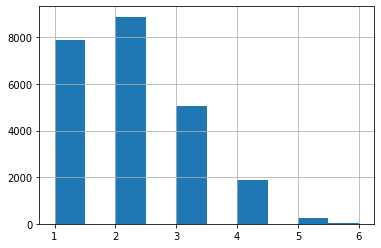

In [93]:
train.AgeBin.hist()

In [154]:
corr_2_cols(train, 'AgeBin', 'default')

default,0,1,perc
AgeBin,,,
1,6046,1839,0.233228
2,7064,1825,0.205310
3,3905,1168,0.230239
4,1412,458,0.244920
5,189,77,0.289474
6,14,3,0.176471


In [95]:
def get_closeness(df):
    for i in range(1, 7):
        df[f'Closeness_{i}'] = (df.LIMIT_BAL - df[f'BILL_AMT{i}']) #/ df.LIMIT_BAL
    
    return df

In [96]:
train = get_closeness(train)
train

,LIMIT_BAL,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,default,SEX_MAR,AgeBin,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6
0,20000,2,2,2,-1,-1,-2,-2,3913,3102,...,0,1,2,1,16087,16898,19311,20000,20000,20000
1,120000,2,-1,2,-1,-1,-1,2,2682,1725,...,2000,1,4,1,117318,118275,117318,116728,116545,116739
2,90000,2,-1,-1,-1,-1,-1,-1,29239,14027,...,5000,0,4,2,60761,75973,76441,75669,75052,74451
3,50000,2,-1,-1,-1,-1,-1,-1,46990,48233,...,1000,0,2,2,3010,1767,709,21686,21041,20453
4,50000,2,-1,-1,-1,-1,-1,-1,8617,5670,...,679,0,1,4,41383,44330,14165,29060,30854,30869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,2,1,2,2,-1,-1,-1,80906,82789,...,1830,0,1,1,-906,-2789,-903,-215,16704,30146
23996,20000,2,-1,-1,-1,-1,-1,-1,14447,15455,...,1000,0,1,1,5553,4545,2438,2678,2881,2650
23997,10000,2,-1,-1,-1,-1,-1,-1,8882,9933,...,1000,0,2,1,1118,67,175,-7506,-6608,824
23998,20000,4,-1,-1,-1,-1,-1,-2,20564,20284,...,0,0,2,1,-564,-284,606,-19950,20000,20000


In [152]:
def get_diff_of_totals(df):
    df['diff'] = 0   # Make placeholder
    
    bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
    pay_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
    
    for index, row in df.iterrows():
        bill_df = df.loc[index, bill_cols]
        pay_df = df.loc[index, pay_cols]

        bill_sum = np.sum(bill_df.values)
        pay_sum = np.sum(pay_df.values)

        df.loc[index, 'diff'] = bill_sum - pay_sum
        
    return df

In [153]:
train = get_diff_of_totals(train)
train

,LIMIT_BAL,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default,SEX_MAR,AgeBin,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6,diff
0,20000,2,2,2,-1,-1,-2,-2,3913,3102,...,1,2,1,16087,16898,19311,20000,20000,20000,7015
1,120000,2,-1,2,-1,-1,-1,2,2682,1725,...,1,4,1,117318,118275,117318,116728,116545,116739,12077
2,90000,2,-1,-1,-1,-1,-1,-1,29239,14027,...,0,4,2,60761,75973,76441,75669,75052,74451,90635
3,50000,2,-1,-1,-1,-1,-1,-1,46990,48233,...,0,2,2,3010,1767,709,21686,21041,20453,222946
4,50000,2,-1,-1,-1,-1,-1,-1,8617,5670,...,0,1,4,41383,44330,14165,29060,30854,30869,50290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,2,1,2,2,-1,-1,-1,80906,82789,...,0,1,1,-906,-2789,-903,-215,16704,30146,424045
23996,20000,2,-1,-1,-1,-1,-1,-1,14447,15455,...,0,1,1,5553,4545,2438,2678,2881,2650,91519
23997,10000,2,-1,-1,-1,-1,-1,-1,8882,9933,...,0,2,1,1118,67,175,-7506,-6608,824,63990
23998,20000,4,-1,-1,-1,-1,-1,-2,20564,20284,...,0,2,1,-564,-284,606,-19950,20000,20000,93574


In [155]:
def drop_bill_amt(df):
    df = df.drop([f'BILL_AMT{i}' for i in range(1, 7)], axis=1)
    return df

In [159]:
def drop_pay_amt(df):
    df = df.drop([f'PAY_AMT{i}' for i in range(1, 7)], axis=1)
    return df

In [160]:
def drop_age(df):
    df = df.drop(['AGE'], axis=1)
    return df